In [2]:
import numpy as np 
import pandas as pd


In [3]:
import pandas as pd

# Pandas display settings (ADD THIS)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Read CSV
df = pd.read_csv("Electric Vehicle Sales by State in India.csv")

# Print head and tail
print(df.head(10))
print(df.tail(10))
print(df.shape)



     Year Month_Name      Date           State                Vehicle_Class Vehicle_Category     Vehicle_Type  EV_Sales_Quantity
0  2014.0        jan  1/1/2014  Andhra Pradesh              ADAPTED VEHICLE           Others           Others                0.0
1  2014.0        jan  1/1/2014  Andhra Pradesh         AGRICULTURAL TRACTOR           Others           Others                0.0
2  2014.0        jan  1/1/2014  Andhra Pradesh                    AMBULANCE           Others           Others                0.0
3  2014.0        jan  1/1/2014  Andhra Pradesh          ARTICULATED VEHICLE           Others           Others                0.0
4  2014.0        jan  1/1/2014  Andhra Pradesh                          BUS              Bus              Bus                0.0
5  2014.0        jan  1/1/2014  Andhra Pradesh                     CASH VAN           Others           Others                0.0
6  2014.0        jan  1/1/2014  Andhra Pradesh        CRANE MOUNTED VEHICLE           Others     

In [4]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [5]:
print(df.head)
print(df.isnull().sum())

<bound method NDFrame.head of          Year Month_Name       Date                     State                      Vehicle_Class Vehicle_Category Vehicle_Type  EV_Sales_Quantity
0      2014.0        jan 2014-01-01            Andhra Pradesh                    ADAPTED VEHICLE           Others       Others                0.0
1      2014.0        jan 2014-01-01            Andhra Pradesh               AGRICULTURAL TRACTOR           Others       Others                0.0
2      2014.0        jan 2014-01-01            Andhra Pradesh                          AMBULANCE           Others       Others                0.0
3      2014.0        jan 2014-01-01            Andhra Pradesh                ARTICULATED VEHICLE           Others       Others                0.0
4      2014.0        jan 2014-01-01            Andhra Pradesh                                BUS              Bus          Bus                0.0
...       ...        ...        ...                       ...                                .

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

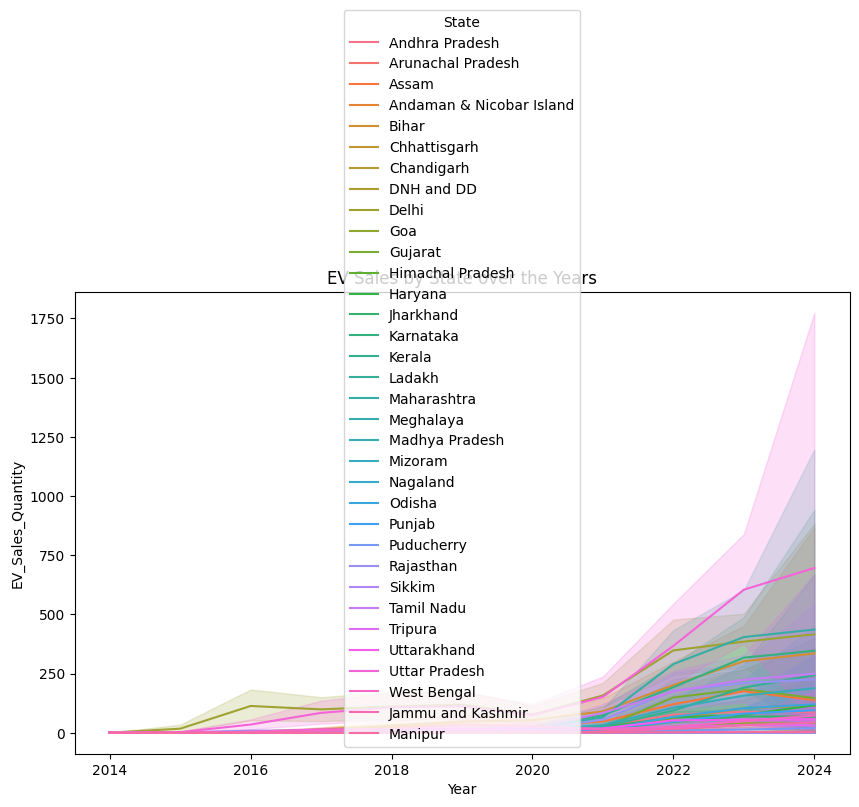

In [7]:
## Plot EV sales over the years
plt.figure(figsize=(10,6))
sns.lineplot(data = df,x = 'Year',y= 'EV_Sales_Quantity',hue='State')
plt.title('EV Sales by State over the Years')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20796\3445399889.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df,x = 'Vehicle_Category',y='EV_Sales_Quantity',ci=None)


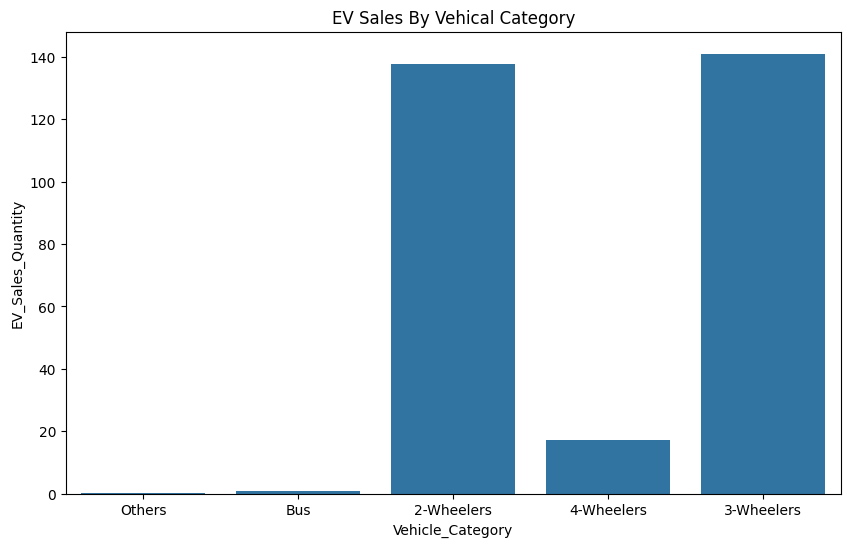

In [8]:
# Plot sales by vehicle category
plt.figure(figsize=(10,6))
sns.barplot(data = df,x = 'Vehicle_Category',y='EV_Sales_Quantity',ci=None)
plt.title('EV Sales By Vehical Category')
plt.show()

State
Uttar Pradesh    732074.0
Maharashtra      401535.0
Karnataka        315498.0
Delhi            268538.0
Rajasthan        228573.0
Bihar            213465.0
Tamil Nadu       206902.0
Gujarat          176713.0
Assam            151917.0
Kerala           133246.0
Name: EV_Sales_Quantity, dtype: float64


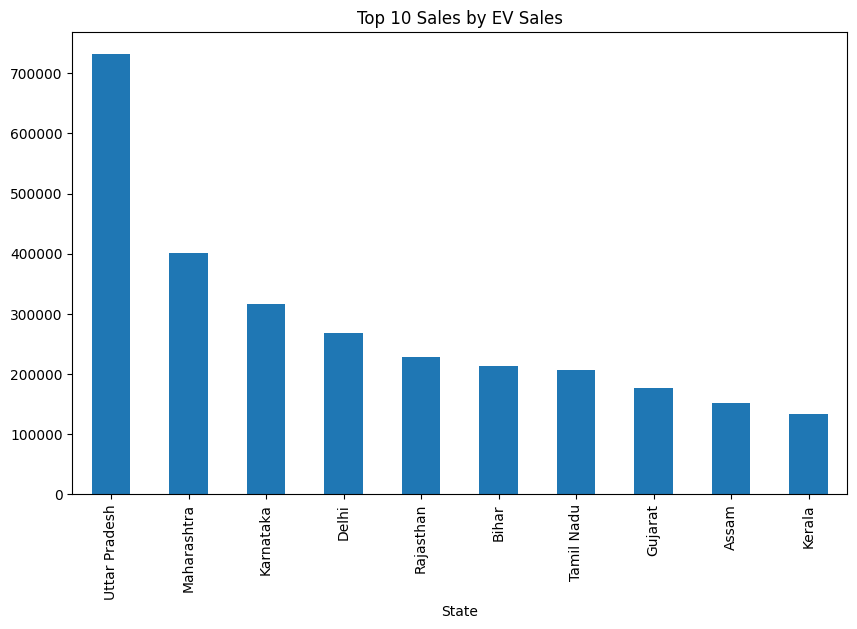

In [9]:
#Top 10 States by EV Sales
top_states = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending = False).head(10)
print(top_states)
plt.figure(figsize=(10,6))
top_states.plot(kind = 'bar')
plt.title('Top 10 Sales by EV Sales')
plt.show()

In [10]:
print(df.head())
print(df.tail())

     Year Month_Name       Date           State         Vehicle_Class Vehicle_Category Vehicle_Type  EV_Sales_Quantity
0  2014.0        jan 2014-01-01  Andhra Pradesh       ADAPTED VEHICLE           Others       Others                0.0
1  2014.0        jan 2014-01-01  Andhra Pradesh  AGRICULTURAL TRACTOR           Others       Others                0.0
2  2014.0        jan 2014-01-01  Andhra Pradesh             AMBULANCE           Others       Others                0.0
3  2014.0        jan 2014-01-01  Andhra Pradesh   ARTICULATED VEHICLE           Others       Others                0.0
4  2014.0        jan 2014-01-01  Andhra Pradesh                   BUS              Bus          Bus                0.0
         Year Month_Name       Date                     State                      Vehicle_Class Vehicle_Category Vehicle_Type  EV_Sales_Quantity
96840  2023.0        dec 2023-12-01  Andaman & Nicobar Island                          MOTOR CAR       4-Wheelers  4W_Personal              

In [11]:
#Extract Month and Day from the Date column
df.drop(['Date','Month_Name'],axis=1,inplace=True)
print(df.head())

     Year           State         Vehicle_Class Vehicle_Category Vehicle_Type  EV_Sales_Quantity
0  2014.0  Andhra Pradesh       ADAPTED VEHICLE           Others       Others                0.0
1  2014.0  Andhra Pradesh  AGRICULTURAL TRACTOR           Others       Others                0.0
2  2014.0  Andhra Pradesh             AMBULANCE           Others       Others                0.0
3  2014.0  Andhra Pradesh   ARTICULATED VEHICLE           Others       Others                0.0
4  2014.0  Andhra Pradesh                   BUS              Bus          Bus                0.0


In [12]:

categorical_cols = [
    'State',
    'Vehicle_Class',
    'Vehicle_Category',
    'Vehicle_Type',
]
#Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df,columns=categorical_cols,drop_first=True)


print(df_encoded)

         Year  EV_Sales_Quantity  State_Andhra Pradesh  State_Arunachal Pradesh  State_Assam  State_Bihar  State_Chandigarh  State_Chhattisgarh  State_DNH and DD  State_Delhi  State_Goa  State_Gujarat  State_Haryana  State_Himachal Pradesh  State_Jammu and Kashmir  State_Jharkhand  State_Karnataka  State_Kerala  State_Ladakh  State_Madhya Pradesh  State_Maharashtra  State_Manipur  State_Meghalaya  State_Mizoram  State_Nagaland  State_Odisha  State_Puducherry  State_Punjab  State_Rajasthan  State_Sikkim  State_Tamil Nadu  State_Tripura  State_Uttar Pradesh  State_Uttarakhand  State_West Bengal  Vehicle_Class_AGRICULTURAL TRACTOR  Vehicle_Class_AMBULANCE  Vehicle_Class_ANIMAL AMBULANCE  Vehicle_Class_ARMOURED/SPECIALISED VEHICLE  Vehicle_Class_ARTICULATED VEHICLE  Vehicle_Class_AUXILIARY TRAILER  Vehicle_Class_BREAKDOWN VAN  Vehicle_Class_BULLDOZER  Vehicle_Class_BUS  Vehicle_Class_CAMPER VAN / TRAILER  Vehicle_Class_CAMPER VAN / TRAILER (PRIVATE USE)  Vehicle_Class_CASH VAN  Vehicle_Cla

In [13]:
#Convert True/False → 0/1
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

print(df_encoded.head())

     Year  EV_Sales_Quantity  State_Andhra Pradesh  State_Arunachal Pradesh  State_Assam  State_Bihar  State_Chandigarh  State_Chhattisgarh  State_DNH and DD  State_Delhi  State_Goa  State_Gujarat  State_Haryana  State_Himachal Pradesh  State_Jammu and Kashmir  State_Jharkhand  State_Karnataka  State_Kerala  State_Ladakh  State_Madhya Pradesh  State_Maharashtra  State_Manipur  State_Meghalaya  State_Mizoram  State_Nagaland  State_Odisha  State_Puducherry  State_Punjab  State_Rajasthan  State_Sikkim  State_Tamil Nadu  State_Tripura  State_Uttar Pradesh  State_Uttarakhand  State_West Bengal  Vehicle_Class_AGRICULTURAL TRACTOR  Vehicle_Class_AMBULANCE  Vehicle_Class_ANIMAL AMBULANCE  Vehicle_Class_ARMOURED/SPECIALISED VEHICLE  Vehicle_Class_ARTICULATED VEHICLE  Vehicle_Class_AUXILIARY TRAILER  Vehicle_Class_BREAKDOWN VAN  Vehicle_Class_BULLDOZER  Vehicle_Class_BUS  Vehicle_Class_CAMPER VAN / TRAILER  Vehicle_Class_CAMPER VAN / TRAILER (PRIVATE USE)  Vehicle_Class_CASH VAN  Vehicle_Class_C

In [14]:
df_encoded.to_csv("EV_Final_Cleaned_Data.csv",index=False)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features (X) and Target (y)
X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (96845, 121)
Target shape: (96845,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (77476, 121)
Testing set size: (19369, 121)


In [17]:
# Create model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Train model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [18]:
y_pred = rf_model.predict(X_test)


In [19]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 143.3552745901236


In [20]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.921082149333493


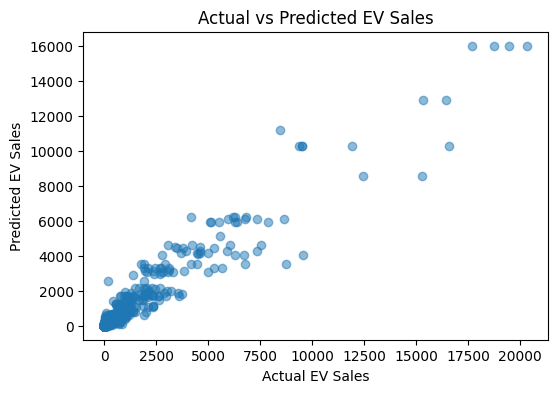

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual EV Sales")
plt.ylabel("Predicted EV Sales")
plt.title("Actual vs Predicted EV Sales")
plt.show()


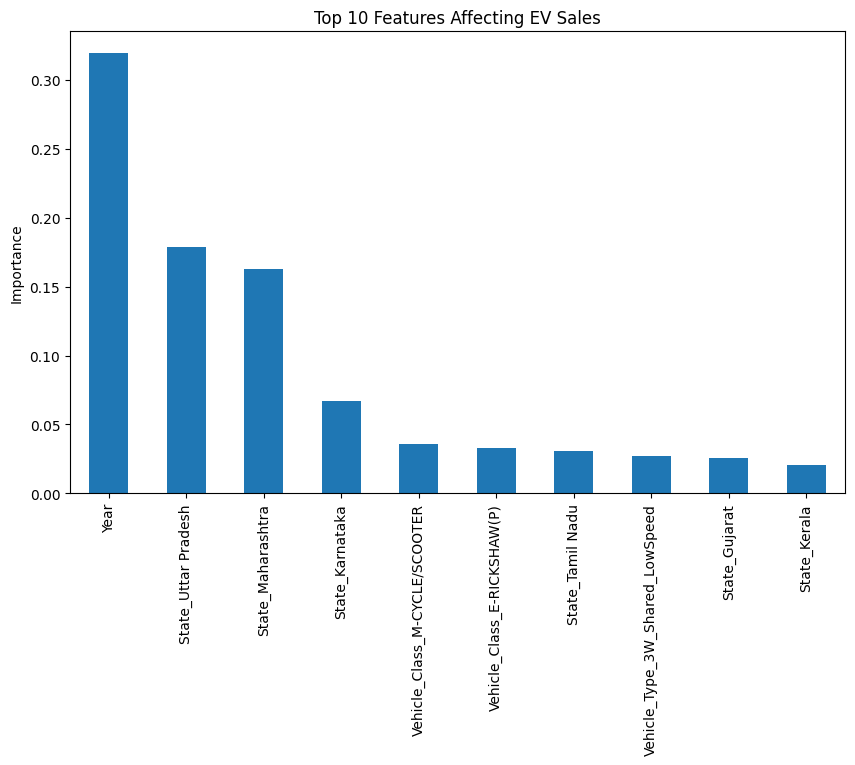

In [22]:
import pandas as pd

# Feature importance
importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# Top 10 features
top_features = importance.head(10)

# Plot
plt.figure(figsize=(10,6))
top_features.plot(kind='bar')
plt.title("Top 10 Features Affecting EV Sales")
plt.ylabel("Importance")
plt.show()


In [ ]:
#Save the Model (Optional)
import joblib

joblib.dump(rf_model, "EV_Sales_RF_Model.pkl")


['EV_Sales_RF_Model.pkl']

In [24]:
#Load karne ke liye:
model = joblib.load("EV_Sales_RF_Model.pkl")


In [26]:
# Save Final Dataset

# Future use ya Excel / Power BI ke liye:

df_encoded.to_csv("EV_Final_Cleaned_Data2.csv", index=False)

In [27]:
# Example: Predict sales for new data row
new_data = X_test.iloc[0:1]  # sample row
predicted_sales = rf_model.predict(new_data)
print(predicted_sales)


[0.02609524]
